<a href="https://colab.research.google.com/github/nidhi-158/Unified-Mentor/blob/main/project1_amazon_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Read the dataset
df=pd.read_csv("/content/Amazon Sales Data.csv")

In [3]:
print(df.head())               #prints the first 5 records of the dataset

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [4]:
print(df.describe())           #shows the statistical analysis

           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   

         Total Cost  Total Profit  
count  1.000000e+02  1.000000e+02  
mean   9.318057e+05  4.416820e+05  
std    1.083938e+06  4.385379e+05  
min    3.612240e+03  1.258020e+03  
25%    1.688680e+05  1.214436e+05  
50%    3.635664e+05  2.907680e+05  
75%    1.613870e+06  6.358288e+05  
max    4.509794e+06  1.719922e+06  


In [5]:
print(df.info())               #prints the column name,type and null records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None


<function matplotlib.pyplot.show(close=None, block=None)>

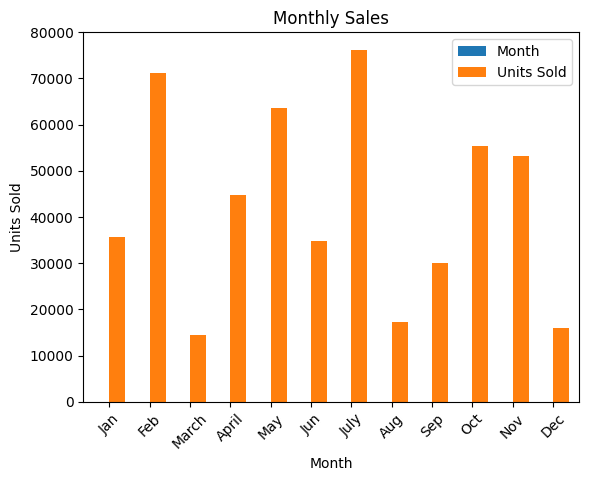

In [6]:
#1. monthly sale
#convert the date into date-time format.
df['Order Date']=pd.to_datetime(df['Order Date'])

#Extract the month from the order date column
df['Month']=df['Order Date'].dt.month

#Group data by month and count the units sold in each month
monthly_sale=df.groupby('Month')['Units Sold'].sum()

#Reset index and column to display result in more readable format
monthly_sale=monthly_sale.reset_index()
monthly_sale.columns=['Month','Units Sold']

#Plot the monthly sales
monthly_sale.plot(kind='bar',width=0.8)
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Monthly Sales')
month_name=['Jan','Feb','March','April','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
plt.xticks(range(12),month_name,rotation=45)
plt.show

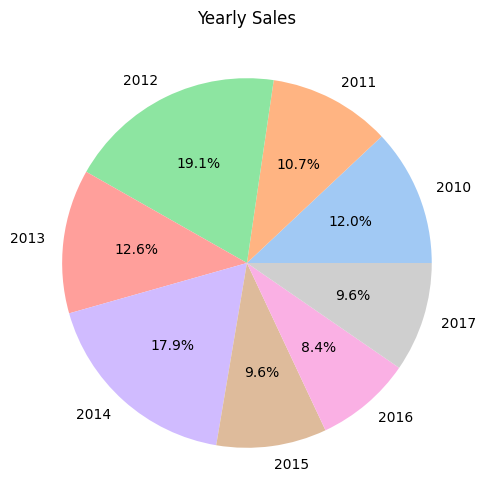

Year
2010    61571
2011    54768
2012    97967
2013    64663
2014    92040
2015    49480
2016    43156
2017    49226
Name: Units Sold, dtype: int64


In [8]:
#2. yearly Sale
#Extract the year from the date column
df['Year']=df['Order Date'].dt.year

#Group data by year and count the units sold in each year
Yearly_sale=df.groupby('Year')['Units Sold'].sum()

#Extract he year from the date column
df['Year']=df['Order Date'].dt.year

#Group data by year and count the units sold in each year
Yearly_sale=df.groupby('Year')['Units Sold'].sum()

#Plot the results
plt.figure(figsize=(8, 6))
plt.pie(Yearly_sale.values, labels=Yearly_sale.index, autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Yearly Sales')
plt.show()
print(Yearly_sale)

In [9]:
#3. yearly month wise sale
yearly_month_wise_sale=df.groupby(['Year','Month'])['Units Sold'].sum().reset_index()
print("\n")
print(yearly_month_wise_sale)



    Year  Month  Units Sold
0   2010      2        9503
1   2010      5       15747
2   2010      6        9905
3   2010     10       14403
4   2010     11        7910
5   2010     12        4103
6   2011      1       12914
7   2011      2        8156
8   2011      4        4187
9   2011      5        5741
10  2011      6         124
11  2011      7         888
12  2011      9        3732
13  2011     11       19026
14  2012      1        1548
15  2012      2       15776
16  2012      3        6457
17  2012      4        8903
18  2012      5       10984
19  2012      6        7620
20  2012      7       22646
21  2012      8        2804
22  2012      9       16545
23  2012     10        4684
24  2013      2        5062
25  2013      3        4063
26  2013      4        5010
27  2013      6        5432
28  2013      7       19546
29  2013      8        9606
30  2013      9        7637
31  2013     10        6182
32  2013     12        2125
33  2014      2       10460
34  2014      4   

<ipython-input-13-152695ac54f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type',y='Units Sold',data=item_sold,palette='viridis')


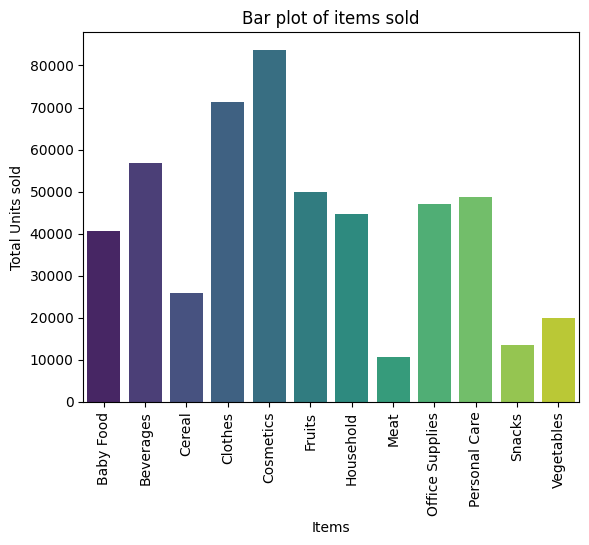

In [13]:
#4. Bar plot of items sold
item_sold = df.groupby('Item Type')['Units Sold'].sum().reset_index()
sns.barplot(x='Item Type',y='Units Sold',data=item_sold,palette='viridis')
plt.xlabel('Items')
plt.ylabel('Total Units sold')
plt.title('Bar plot of items sold')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()



Country wise Sale:
Sales Channel
Offline    50
Online     50
Name: Units Sold, dtype: int64


<ipython-input-15-f799b58b2cbb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_wise_sale.index,y=channel_wise_sale.values,palette='viridis')


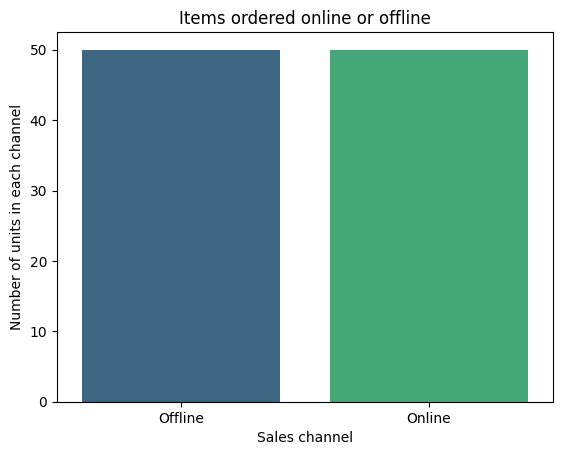

In [15]:
#5. Sales according to channel
channel_wise_sale=df.groupby('Sales Channel')['Units Sold'].count()
print("\nCountry wise Sale:")
print(channel_wise_sale)
sns.barplot(x=channel_wise_sale.index,y=channel_wise_sale.values,palette='viridis')
plt.xlabel("Sales channel")
plt.ylabel("Number of units in each channel")
plt.title("Items ordered online or offline")
plt.show()



Order Priority
C    22
H    30
L    27
M    21
Name: Order ID, dtype: int64


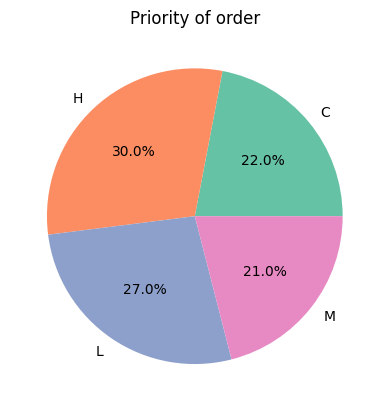

In [23]:
#6. priority wise selling

priority_selling=df.groupby('Order Priority')['Order ID'].count()
print("\n")
print(priority_selling)
#plt.figure(figsize=(9,6))
plt.pie(priority_selling,labels=priority_selling.index,autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Priority of order')
plt.show()

<ipython-input-29-e08117ceab79>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_wise_profit_pct.index,y=product_wise_profit_pct.values,palette="cubehelix")


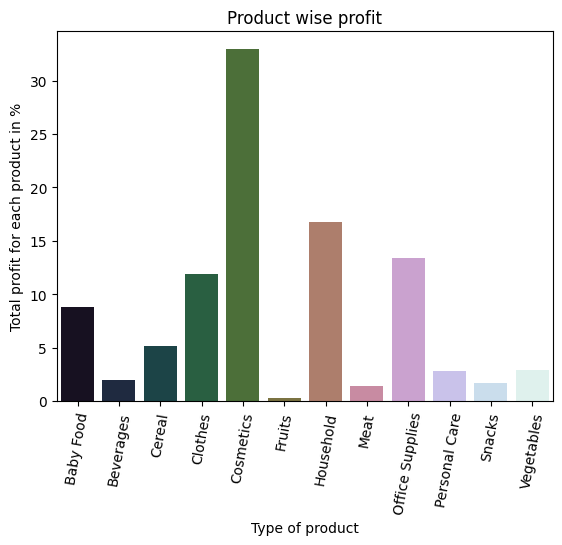



Item Type
Baby Food           8.799643
Beverages           2.010603
Cereal              5.190258
Clothes            11.848648
Cosmetics          32.955948
Fruits              0.272810
Household          16.782676
Meat                1.382465
Office Supplies    13.425007
Personal Care       2.763578
Snacks              1.702456
Vegetables          2.865907
Name: Total Profit, dtype: float64


In [29]:
#7. product wise profit
product_wise_profit=df.groupby('Item Type')['Total Profit'].sum()
total_profit = product_wise_profit.sum()
product_wise_profit_pct = (product_wise_profit / total_profit) * 100

sns.barplot(x=product_wise_profit_pct.index,y=product_wise_profit_pct.values,palette="cubehelix")
plt.xlabel("Type of product")
plt.ylabel("Total profit for each product in %")
plt.title('Product wise profit')
#plt.tight_layout()
plt.xticks(rotation=80)
plt.show()
print("\n")
print(product_wise_profit_pct)

Region
Asia                                 11
Australia and Oceania                11
Central America and the Caribbean     7
Europe                               22
Middle East and North Africa         10
North America                         3
Sub-Saharan Africa                   36
Name: Units Sold, dtype: int64


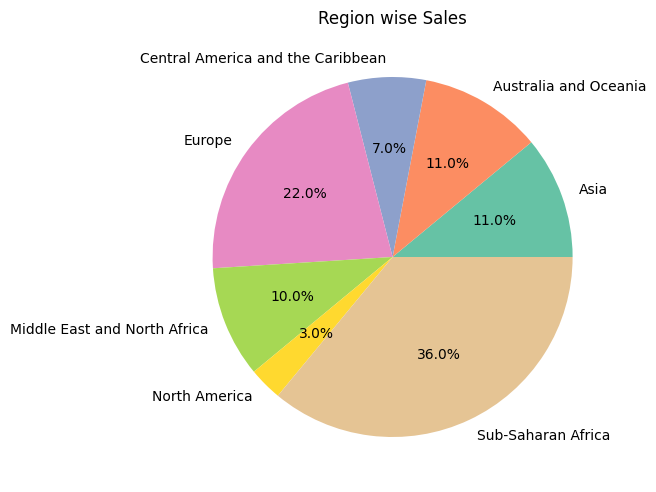

In [27]:
#8. Region wise sale
#print("\n")
region_wise=df.groupby('Region')['Units Sold'].count()
plt.pie(region_wise,labels=region_wise.index,autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Region wise Sales")
print(region_wise)

<ipython-input-32-8f85f77861b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_wise_total_cost_pct.values, y=product_wise_total_cost_pct.index,palette="viridis")


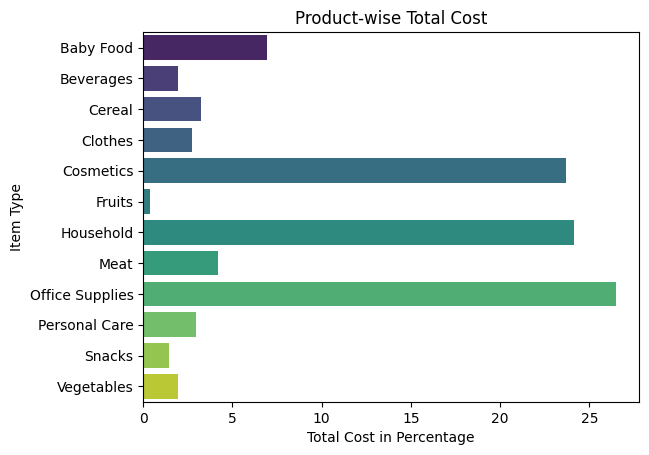

Item Type
Baby Food           6.936729
Beverages           1.934682
Cereal              3.252240
Clothes             2.740870
Cosmetics          23.658860
Fruits              0.371307
Household          24.122096
Meat                4.177980
Office Supplies    26.460233
Personal Care       2.962294
Snacks              1.426037
Vegetables          1.956671
Name: Total Cost, dtype: float64


In [32]:
#9.Total cost of each product
product_wise_total_cost=df.groupby('Item Type')['Total Cost'].sum()

total_cost = product_wise_total_cost.sum()
product_wise_total_cost_pct = (product_wise_total_cost / total_cost) * 100

#plt.figure(figsize=(6, 5))
sns.barplot(x=product_wise_total_cost_pct.values, y=product_wise_total_cost_pct.index,palette="viridis")
plt.title('Product-wise Total Cost')
plt.xlabel('Total Cost in Percentage')
plt.ylabel('Item Type')
plt.show()
#print("\n")
print(product_wise_total_cost_pct)